<a href="https://colab.research.google.com/github/Josh-Warren11/RandomNotes/blob/main/Notebook4_JoshWarren.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook \#4

## Part 1:
**1.) Using scikit learn (sklearn)** You must run at least 6 variations of the algorithms and display their results using an appropriate regression metric (again, use the scikit-learn modules). I will be looking for the following to be included in your comparison:

*   k-Nearest-Neighbor with a **small value of k**
*   k-Nearest-Neighbor with a **large value of k**
*   **weighted k-Nearest-Neighbor** with a **small value of k** (the same one you used for the unweighted version)
*  **weighted k-Nearest-Neighbor** with a **large value of k** (the same one you used for the unweighted version) 
*   a **decision tree with default** parameter values
*   a **decision tree**, setting some kind of parameter that results in a **smaller tree**

You will need to use the documentation for sklearn for this Notebook. Here are some helpful links:
* [K Neighbors Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)
* [Decision Tree Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) 


In [3]:
# load in the data and necessary libraries
import sklearn
import pandas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/drive')
wine = pandas.read_csv('/content/drive/MyDrive/CS167/datasets/winequality-white.csv') # change this to match your dataset directory

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
predictors = ['fixed acidity', 'volatile acidity','citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']
target = ['quality']
train_data, test_data, train_sln, test_sln = \
        train_test_split(wine[predictors], wine[target], test_size = 0.2, random_state=20)
train_sln

,quality
605,6
392,5
849,5
1418,5
459,3
...,...
924,5
1247,5
271,6
474,6


In [21]:
print('train_data shape: ',train_data.shape)
print('test_data shape: ',test_data.shape)
print('train_sln shape: ',train_sln.shape)
print('test_sln shape: ',test_sln.shape)

train_data shape:  (1279, 11)
test_data shape:  (320, 11)
train_sln shape:  (1279, 1)
test_sln shape:  (320, 1)


In [22]:
# kNN with small k
from sklearn.neighbors import KNeighborsRegressor
knn1 = KNeighborsRegressor(n_neighbors = 3)
knn1.fit(train_data, train_sln)
prediction = knn1.predict(test_data)
from sklearn.metrics import mean_squared_error
mean_squared_error(test_sln, prediction)

0.5163194444444444

In [23]:
# kNN with large k
from sklearn.neighbors import KNeighborsRegressor
knn2 = KNeighborsRegressor(n_neighbors = 15)
knn2.fit(train_data, train_sln)
prediction = knn2.predict(test_data)
from sklearn.metrics import mean_squared_error
mean_squared_error(test_sln, prediction)

0.5149166666666667

In [24]:
# w-knn with small k
from sklearn.neighbors import KNeighborsRegressor
knn3 = KNeighborsRegressor(n_neighbors = 3, weights='distance')
knn3.fit(train_data, train_sln)
prediction = knn3.predict(test_data)
from sklearn.metrics import mean_squared_error
mean_squared_error(test_sln, prediction)

0.4584128585464352

In [25]:
# w-knn with large k
from sklearn.neighbors import KNeighborsRegressor
knn4 = KNeighborsRegressor(n_neighbors = 15, weights='distance')
knn4.fit(train_data, train_sln)
prediction = knn4.predict(test_data)
from sklearn.metrics import mean_squared_error
mean_squared_error(test_sln, prediction)

0.4259770045083974

[Text(151.92035300136425, 209.6742857142857, 'X[10] <= 10.15\nmse = 0.589\nsamples = 320\nvalue = 5.691'),
 Text(64.1738062755798, 194.14285714285714, 'X[9] <= 0.555\nmse = 0.356\nsamples = 158\nvalue = 5.316'),
 Text(23.751159618008188, 178.61142857142858, 'X[1] <= 0.95\nmse = 0.294\nsamples = 51\nvalue = 5.02'),
 Text(14.616098226466576, 163.07999999999998, 'X[10] <= 9.35\nmse = 0.221\nsamples = 49\nvalue = 5.061'),
 Text(7.308049113233288, 147.54857142857142, 'X[6] <= 55.5\nmse = 0.25\nsamples = 6\nvalue = 4.5'),
 Text(3.654024556616644, 132.01714285714286, 'mse = 0.0\nsamples = 3\nvalue = 4.0'),
 Text(10.962073669849932, 132.01714285714286, 'mse = 0.0\nsamples = 3\nvalue = 5.0'),
 Text(21.924147339699864, 147.54857142857142, 'X[1] <= 0.315\nmse = 0.167\nsamples = 43\nvalue = 5.14'),
 Text(18.27012278308322, 132.01714285714286, 'mse = 0.0\nsamples = 2\nvalue = 6.0'),
 Text(25.57817189631651, 132.01714285714286, 'X[8] <= 3.275\nmse = 0.137\nsamples = 41\nvalue = 5.098'),
 Text(16.443

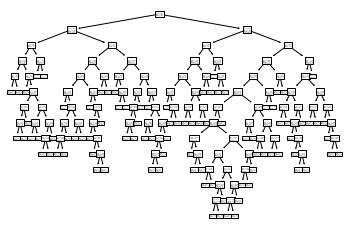

In [26]:
# decision tree with default paramters
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
regular = tree.DecisionTreeRegressor(random_state=10)
regular = regular.fit(test_data, test_sln)
tree.plot_tree(regular)

[Text(167.4, 181.2, 'X[10] <= 10.15\nmse = 0.589\nsamples = 320\nvalue = 5.691'),
 Text(83.7, 108.72, 'X[9] <= 0.555\nmse = 0.356\nsamples = 158\nvalue = 5.316'),
 Text(41.85, 36.23999999999998, 'mse = 0.294\nsamples = 51\nvalue = 5.02'),
 Text(125.55000000000001, 36.23999999999998, 'mse = 0.323\nsamples = 107\nvalue = 5.458'),
 Text(251.10000000000002, 108.72, 'X[1] <= 0.355\nmse = 0.546\nsamples = 162\nvalue = 6.056'),
 Text(209.25, 36.23999999999998, 'mse = 0.529\nsamples = 43\nvalue = 6.512'),
 Text(292.95, 36.23999999999998, 'mse = 0.45\nsamples = 119\nvalue = 5.891')]

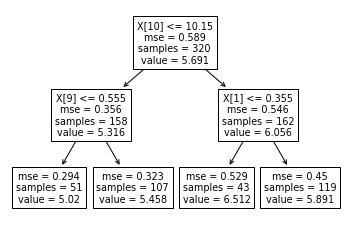

In [27]:
# decision tree with some kind of parameter that (hopefully) results in a smaller tree
regular = tree.DecisionTreeRegressor(random_state=10, max_depth=2)
regular = regular.fit(test_data, test_sln)
tree.plot_tree(regular)

## Part 2: kNN on Normalized data
**2.)** Normalize the data and run a k-Nearest-Neighbor algorithm on it. (use the StandardScalar from sklearn)

In [29]:
# normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalize = scaler.transform(train_data)
test_data_normalize = scaler.transform(test_data)

# run a knn
from sklearn.neighbors import KNeighborsRegressor
knn1 = KNeighborsRegressor(n_neighbors = 3)
knn1.fit(train_data_normalize, train_sln)
prediction = knn1.predict(test_data_normalize)
from sklearn.metrics import mean_squared_error
mean_squared_error(test_sln, prediction)

0.47951388888888885

## Part 3:
**3.)**Use a Markup cell to answer the following questions:

- What algorithm performed better? kNN or Decision Trees? Why do you think this was the case?
- What effect did normalizing the data have on your results? Explain.

The weighted kNN algorithm with a lot of neighbors performed the best. This makes sense to me because were working with regressions which works better with kNN. Normalizing the data found the z-score of hte data, making the data points that weere further away more meaningful. It did turn a better score than the original kNN1.